In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data_Mining/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mv '/content/drive/MyDrive/Colab_Notebooks_3/Copy_of_A2_feature_eng.ipynb' '/content/drive/MyDrive/Data_Mining/' 

mv: cannot stat '/content/drive/MyDrive/Colab_Notebooks_3/Copy_of_A2_feature_eng.ipynb': No such file or directory


In [3]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ndcg_score
sns.set_style("whitegrid")

In [4]:

train = pd.read_csv(path +'/training_set_VU_DM.csv', nrows=2000000)

In [5]:
test = pd.read_csv(path +'/test_set_VU_DM.csv')

In [6]:
print(train.shape[0])

2000000


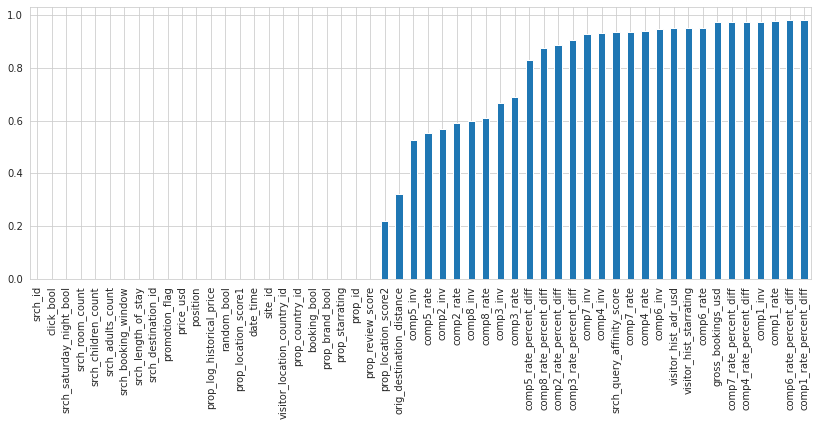

In [7]:
percentage_missing_data = train.isnull().sum()/train.shape[0]
percentage_missing_data = percentage_missing_data.sort_values()
plt.figure(figsize=(14,5))
percentage_missing_data.plot.bar()

#Basic stastics

In [8]:
"""
#some basic statistics
unique_user_seaches = len(train['srch_id'].unique())
user_clicks = (train['click_bool']==1).sum()

avg_user_click_per_search = user_clicks/unique_user_seaches
print('average clicks per user search:', avg_user_click_per_search)

user_bookings = (train['booking_bool']==1).sum()
avg_user_bookings_per_search = user_bookings/unique_user_seaches
print('average bookins per user search:', avg_user_bookings_per_search)

user_dont_clicks = (train['click_bool']==0).sum()
percentage_if_user_clicks = user_clicks/user_dont_clicks*100
print('Percentage if user clicks on all given search results',percentage_if_user_clicks)
"""

"\n#some basic statistics\nunique_user_seaches = len(train['srch_id'].unique())\nuser_clicks = (train['click_bool']==1).sum()\n\navg_user_click_per_search = user_clicks/unique_user_seaches\nprint('average clicks per user search:', avg_user_click_per_search)\n\nuser_bookings = (train['booking_bool']==1).sum()\navg_user_bookings_per_search = user_bookings/unique_user_seaches\nprint('average bookins per user search:', avg_user_bookings_per_search)\n\nuser_dont_clicks = (train['click_bool']==0).sum()\npercentage_if_user_clicks = user_clicks/user_dont_clicks*100\nprint('Percentage if user clicks on all given search results',percentage_if_user_clicks)\n"

## Outliers

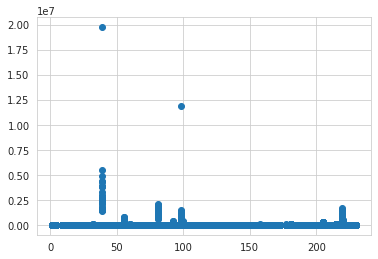

In [9]:

plt.scatter(train['prop_country_id'],train['price_usd'])
plt.show()

600.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


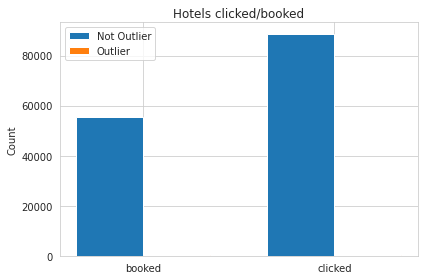

In [10]:
df_booked = train[(train['booking_bool'] == 1)]
df_clicked = train[(train['click_bool'] == 1)]

q_99 = train['price_usd'].quantile(0.99) # 99th percentile
print(q_99)
count_booked_above = df_booked[df_booked['price_usd']>q_99]['srch_id'].count()
count_booked_below = df_booked[df_booked['price_usd']<=q_99]['srch_id'].count()

labels = ['booked', 'clicked']

below = []
above = []
below.append(count_booked_below)
above.append(count_booked_above)

count_click_above = df_clicked[df_clicked['price_usd']>q_99]['srch_id'].count()
count_click_below = df_clicked[df_clicked['price_usd']<=q_99]['srch_id'].count()

below.append(count_click_below)
above.append(count_click_above)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, below, width, label='Not Outlier')
rects2 = ax.bar(x + width/2, above, width, label='Outlier')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Hotels clicked/booked')
ax.set_xticks(x, labels)
ax.legend()

plt.xticks(x, labels)

fig.tight_layout()

plt.show()


## very less number of clicks/booking for price_usd outliers

#Analysis of datetime

In [11]:
#split the date_time column in an hour, year, month and day of the week column
train['Dates'] = pd.to_datetime(train['date_time']).dt.date
train['hour'] = pd.to_datetime(train['date_time']).dt.hour

train['year'] = pd.to_datetime(train['Dates']).dt.year
train['month'] = pd.to_datetime(train['Dates']).dt.month

train['Dates'] = pd.to_datetime(train['Dates'])
train['dayOfWeek'] = train['Dates'].dt.dayofweek

#columns that are used in other columns dropped
train = train.drop(['Dates', 'date_time'], axis=1)
train

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,hour,year,month,dayOfWeek
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,0.0,0.0,NaN,0,NaN,0,8,2013,4,3
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,0.0,0.0,NaN,0,NaN,0,8,2013,4,3
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,0.0,0.0,NaN,0,NaN,0,8,2013,4,3
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,-1.0,0.0,5.0,0,NaN,0,8,2013,4,3
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,0.0,0.0,NaN,0,NaN,0,8,2013,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,134226,5,219,NaN,NaN,219,28176,3,4.0,1,...,NaN,NaN,NaN,0,NaN,0,8,2013,1,1
1999996,134226,5,219,NaN,NaN,219,28224,3,4.5,1,...,NaN,NaN,NaN,0,NaN,0,8,2013,1,1
1999997,134226,5,219,NaN,NaN,219,42232,2,2.5,1,...,NaN,NaN,NaN,0,NaN,0,8,2013,1,1
1999998,134226,5,219,NaN,NaN,219,43051,3,3.5,1,...,NaN,NaN,NaN,0,NaN,0,8,2013,1,1


In [12]:
#split the date_time column in an hour, year, month and day of the week column
test['Dates'] = pd.to_datetime(test['date_time']).dt.date
test['hour'] = pd.to_datetime(test['date_time']).dt.hour

test['year'] = pd.to_datetime(test['Dates']).dt.year
test['month'] = pd.to_datetime(test['Dates']).dt.month

test['Dates'] = pd.to_datetime(test['Dates'])
test['dayOfWeek'] = test['Dates'].dt.dayofweek

#columns that are used in other columns dropped
test = test.drop(['Dates', 'date_time'], axis=1)
test

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,hour,year,month,dayOfWeek
0,1,24,216,NaN,NaN,219,3180,3,4.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2013,2,5
1,1,24,216,NaN,NaN,219,5543,3,4.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2013,2,5
2,1,24,216,NaN,NaN,219,14142,2,3.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2013,2,5
3,1,24,216,NaN,NaN,219,22393,3,4.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2013,2,5
4,1,24,216,NaN,NaN,219,24194,3,4.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2013,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959178,332787,24,216,NaN,NaN,117,32019,4,3.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2013,5,1
4959179,332787,24,216,NaN,NaN,117,33959,4,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2013,5,1
4959180,332787,24,216,NaN,NaN,117,35240,4,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2013,5,1
4959181,332787,24,216,NaN,NaN,117,94437,4,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2013,5,1


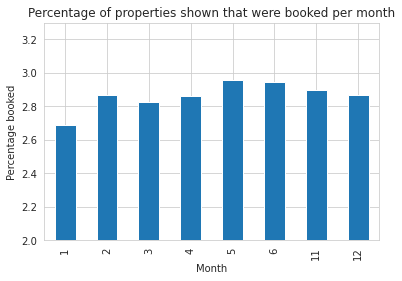

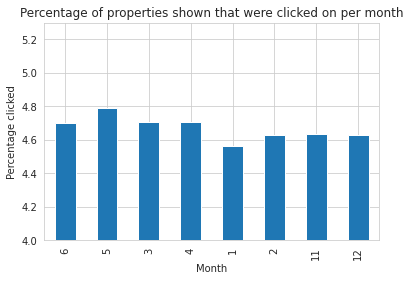

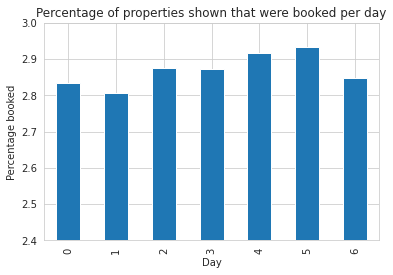

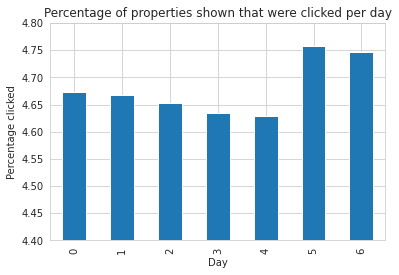

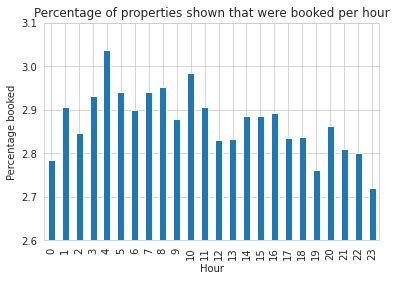

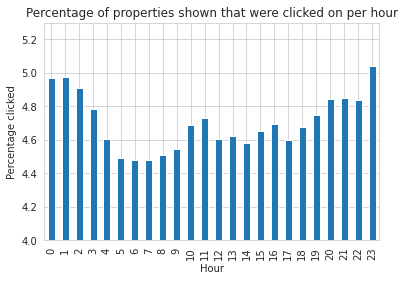

2013    4.687205
2012    4.633473
Name: year, dtype: float64
2013    2.862119
2012    2.882841
Name: year, dtype: float64


In [13]:
"""
#graphs per month if a customer booked or clicked on the property
sns.countplot(x='month', hue='booking_bool',  data=train)
plt.show()
sns.countplot(x='month', hue='click_bool', data=train)
plt.show()
"""

#counts of clicked or not clicked per month
not_clicked_per_month = train[train["click_bool"]==0]['month'].value_counts()
clicked_per_month = train[train["click_bool"]==1]['month'].value_counts()

#percentage per month if the customer clicked on the property
percentage_clicked_month = clicked_per_month/not_clicked_per_month * 100
#print(percentage_clicked_month)


#counts of booked or not booked per month
not_booked_per_month = train[train["booking_bool"]==0]['month'].value_counts()
booked_per_month = train[train["booking_bool"]==1]['month'].value_counts()

#percentage per month if the customer booked the property
percentage_booked_month = booked_per_month/not_booked_per_month * 100
#print(percentage_booked_month.index)

percentage_booked_month.plot.bar()
plt.title('Percentage of properties shown that were booked per month')
plt.xlabel('Month')
plt.ylabel('Percentage booked')
plt.ylim((2,3.3))
plt.show()
percentage_clicked_month.plot.bar()
plt.title('Percentage of properties shown that were clicked on per month')
plt.ylim((4,5.3))
plt.xlabel('Month')
plt.ylabel('Percentage clicked')
plt.show()
"""
sns.countplot(x='dayOfWeek', hue='booking_bool',  data=train)
plt.show()
sns.countplot(x='dayOfWeek', hue='click_bool', data=train)
plt.show()
"""

#counts of clicked or not clicked per day
not_clicked_per_day = train[train["click_bool"]==0]['dayOfWeek'].value_counts()
clicked_per_day = train[train["click_bool"]==1]['dayOfWeek'].value_counts()

#percentage per day if the customer clicked on the property
percentage_clicked_day = clicked_per_day/not_clicked_per_day * 100
percentage_clicked_day = percentage_clicked_day.sort_index()

#counts of booked or not booked perday
not_booked_per_day = train[train["booking_bool"]==0]['dayOfWeek'].value_counts()
booked_per_day = train[train["booking_bool"]==1]['dayOfWeek'].value_counts()

#percentage per day if the customer booked the property
percentage_booked_day = booked_per_day/not_booked_per_day * 100
percentage_booked_day = percentage_booked_day.sort_index()

percentage_booked_day.plot.bar()
plt.title('Percentage of properties shown that were booked per day')
plt.ylim((2.4,3.0))
plt.xlabel('Day')
plt.ylabel('Percentage booked')
plt.show()
percentage_clicked_day.plot.bar()
plt.title('Percentage of properties shown that were clicked per day')
plt.xlabel('Day')
plt.ylabel('Percentage clicked')
plt.ylim((4.4,4.8))
plt.show()
"""
#graphs of clicking/booking per hour
sns.countplot(x='hour', hue='booking_bool',  data=train)
plt.show()
sns.countplot(x='hour', hue='click_bool', data=train)
plt.show()
"""

#counts of clicked or not clicked per year
not_clicked_per_hour = train[train["click_bool"]==0]['hour'].value_counts()
clicked_per_hour = train[train["click_bool"]==1]['hour'].value_counts()

#percentage per hour if the customer clicked on the property
percentage_clicked_hour = clicked_per_hour/not_clicked_per_hour *100
#print(percentage_clicked_hour)

#counts of clicked or not clicked per year
not_booked_per_hour = train[train["booking_bool"]==0]['hour'].value_counts()
booked_per_hour = train[train["booking_bool"]==1]['hour'].value_counts()

#percentage per hour if the customer booked on the property
percentage_booked_hour = booked_per_hour/not_booked_per_hour *100
#print(percentage_clicked_hour)

#sns.barplot(y=percentage_booked_hour)
percentage_booked_hour.plot.bar()
plt.title('Percentage of properties shown that were booked per hour')
plt.xlabel('Hour')
plt.ylabel('Percentage booked')
plt.ylim((2.6,3.1))
plt.show()
percentage_clicked_hour.plot.bar()
plt.title('Percentage of properties shown that were clicked on per hour')
plt.ylim((4,5.3))
plt.xlabel('Hour')
plt.ylabel('Percentage clicked')
plt.show()

#counts of clicked or not clicked per year
not_clicked_per_year = train[train["click_bool"]==0]['year'].value_counts()
clicked_per_year = train[train["click_bool"]==1]['year'].value_counts()

#percentage per year if the customer clicked on the property
percentage_clicked_year = clicked_per_year/not_clicked_per_year*100
print(percentage_clicked_year)

#counts of clicked or not clicked per year
not_booked_per_year = train[train["booking_bool"]==0]['year'].value_counts()
booked_per_year = train[train["booking_bool"]==1]['year'].value_counts()

#percentage per year if the customer clicked on the property
percentage_booked_year = booked_per_year/not_booked_per_year*100
print(percentage_booked_year)

In [14]:
#drop year because really similar and only 2
#other feature seem relevant
train = train.drop(['year'], axis=1)
test = test.drop(['year'], axis=1)

In [15]:
print(train.isnull().sum())

srch_id                              0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        1899168
visitor_hist_adr_usd           1898852
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 2934
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2            436913
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      1870054
orig_destination_distance       644506
random_bool              

## Analysis of features - 'prop_review_score', 'prop_location_score2', 'srch_query_affinity_score'

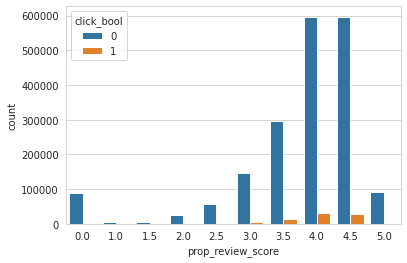

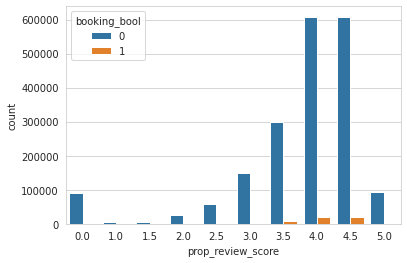

In [16]:

sns.countplot(x= 'prop_review_score', hue='click_bool' ,data=train) 
plt.show()
sns.countplot(x= 'prop_review_score', hue='booking_bool' ,data=train) 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


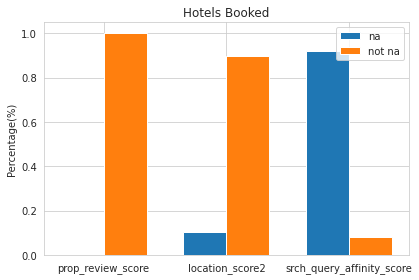

In [17]:
# Grouped Bar Chart

# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

empty = []
non_empty = []

labels = ['prop_review_score', 'location_score2', 'srch_query_affinity_score']

prop_review_score_na = df_booked['prop_review_score'].isna().sum()
prop_review_score_not_na = df_booked['prop_review_score'].notna().sum()

sum = prop_review_score_na + prop_review_score_not_na
empty.append(prop_review_score_na/sum)
non_empty.append(prop_review_score_not_na/sum)

prop_loc_na = df_booked['prop_location_score2'].isna().sum()
prop_loc_not_na = df_booked['prop_location_score2'].notna().sum()


sum = prop_loc_na + prop_loc_not_na
empty.append(prop_loc_na/sum)
non_empty.append(prop_loc_not_na/sum)

srch_query_affinity_na = df_booked['srch_query_affinity_score'].isna().sum()
srch_query_affinity_not_na = df_booked['srch_query_affinity_score'].notna().sum()

sum = srch_query_affinity_not_na + srch_query_affinity_na
empty.append(srch_query_affinity_na/sum)
non_empty.append(srch_query_affinity_not_na/sum)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, empty, width, label='na')
rects2 = ax.bar(x + width/2, non_empty, width, label='not na')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage(%)')
ax.set_title('Hotels Booked')
ax.set_xticks(x, labels)
ax.legend()

plt.xticks(x, labels)

fig.tight_layout()

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


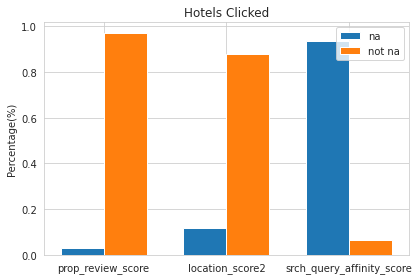

In [18]:
# Grouped Bar Chart

import matplotlib.pyplot as plt
import numpy as np

empty = []
non_empty = []

labels = ['prop_review_score', 'location_score2', 'srch_query_affinity_score']

prop_review_score_na = df_clicked['prop_review_score'].isna().sum() + df_clicked[(df_clicked['prop_review_score'] == 0)]['prop_review_score'].count()
prop_review_score_not_na = df_clicked['prop_review_score'].notna().sum()

sum = prop_review_score_na + prop_review_score_not_na
empty.append(prop_review_score_na/sum)
non_empty.append(prop_review_score_not_na/sum)

prop_loc_na = df_clicked['prop_location_score2'].isna().sum()
prop_loc_not_na = df_clicked['prop_location_score2'].notna().sum()


sum = prop_loc_na + prop_loc_not_na
empty.append(prop_loc_na/sum)
non_empty.append(prop_loc_not_na/sum)

srch_query_affinity_na = df_clicked['srch_query_affinity_score'].isna().sum()
srch_query_affinity_not_na = df_clicked['srch_query_affinity_score'].notna().sum()

sum = srch_query_affinity_not_na + srch_query_affinity_na
empty.append(srch_query_affinity_na/sum)
non_empty.append(srch_query_affinity_not_na/sum)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, empty, width, label='na')
rects2 = ax.bar(x + width/2, non_empty, width, label='not na')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage(%)')
ax.set_title('Hotels Clicked')
ax.set_xticks(x, labels)
ax.legend()

plt.xticks(x, labels)

fig.tight_layout()

plt.show()


User more likley to book or click on a hotel with non-missing values for review_score and location_score2. Therefore, fill the missing values in these columns with worst case scenario.

In [19]:
train['prop_review_score'] = train['prop_review_score'].fillna(0)
train['prop_location_score2'] = train['prop_location_score2'].fillna(0)


## Analysis for srch_affinity_score

(array([2.72863226e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.45726452e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.72863226e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.72863226e-05,
        2.72863226e-05, 0.00000000e+00, 0.00000000e+00, 1.91004258e-04,
        0.00000000e+00, 5.45726452e-05, 5.45726452e-05, 1.09145290e-04,
        1.91004258e-04, 1.91004258e-04, 5.73012774e-04, 7.09444387e-04,
        7.64017033e-04, 1.74632465e-03, 2.89235019e-03, 3.87465781e-03,
        7.55831136e-03, 1.14329692e-02, 1.98098702e-02, 3.20614290e-02,
        4.94701029e-02, 2.40938229e-02]),
 array([-323.9768  , -317.564132, -311.151464, -304.738796, -298.326128,
        -291.91346 , 

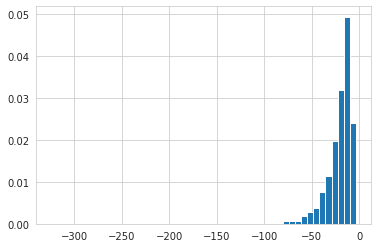

In [20]:
plt.hist(df_clicked['srch_query_affinity_score'], density=True, bins=50)  # density=False would make counts


(array([3.52968161e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52968161e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52968161e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52968161e-05,
        3.52968161e-05, 0.00000000e+00, 0.00000000e+00, 3.52968161e-05,
        0.00000000e+00, 7.05936322e-05, 3.52968161e-05, 1.05890448e-04,
        2.47077713e-04, 2.47077713e-04, 7.05936322e-04, 8.11826771e-04,
        9.88310851e-04, 1.97662170e-03, 3.42379116e-03, 4.55328928e-03,
        8.64771995e-03, 1.27068538e-02, 2.09310120e-02, 3.25789613e-02,
        4.58505641e-02, 2.18487292e-02]),
 array([-323.9768  , -317.564132, -311.151464, -304.738796, -298.326128,
        -291.91346 , 

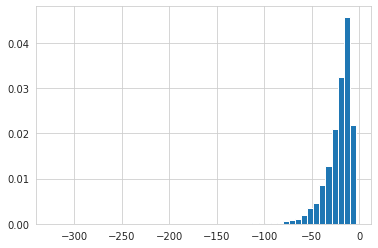

In [21]:
plt.hist(df_booked['srch_query_affinity_score'], density=True, bins=50)  # density=False would make counts

For high srch_affinity_score(probability is proportional to srch_affinity_score), we see a larger fraction of Hotels clicked/booked. Therefore, this implies srch_affinity_score does play a role in the user's choice.

## Analysis of visitor_hist_starrating and visitor_hist_adr_usd

In [22]:
train['hist_starrating_bool'] = np.where(train['visitor_hist_starrating'].isna(),0,1)
print(" Median : visitor_hist_starrating - ", train['visitor_hist_starrating'].median())
print(" Median: visitor_hist_adr_usd - ", train['visitor_hist_adr_usd'].median())

train['visitor_hist_starrating'] = train['visitor_hist_starrating'].fillna(train['visitor_hist_starrating'].median())
train['visitor_hist_adr_usd'] = train['visitor_hist_adr_usd'].fillna(train['visitor_hist_adr_usd'].median())


 Median : visitor_hist_starrating -  3.44
 Median: visitor_hist_adr_usd -  152.32


In [23]:
train['rating_diff'] = abs(train['visitor_hist_starrating'] - train['prop_starrating'])
train['price_diff'] = abs(np.log(train['visitor_hist_adr_usd']) - np.log(train['price_usd']))


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
train.drop(['visitor_hist_starrating','rating_diff'],axis=1,inplace=True)

In [25]:

print(train[(train['booking_bool']==1) & (train['price_diff'] == np.inf)]['srch_id'].count())
print(train[(train['click_bool']==1) & (train['price_diff'] == np.inf)]['srch_id'].count())
print(train[train['price_diff'] == np.inf]['srch_id'].count())
p = train[train['price_diff']!=np.inf]['price_diff'].max()

# replace inf with the maximum value
train['price_diff'].replace(np.inf, p,inplace=True)

1
1
3


In [26]:
## listwise features
## price rank
train["price_rank"] = train.groupby("srch_id")["price_usd"].rank("dense", ascending=False)
train[["price_rank","price_usd"]].head(30)

,price_rank,price_usd
0,20.0,104.77
1,9.0,170.74
2,8.0,179.80
3,1.0,602.77
4,12.0,143.58
5,4.0,195.32
6,15.0,129.35
7,22.0,85.37
8,11.0,150.05
9,2.0,280.69


In [27]:
#train[["price_rank","price_usd"]].head(20).sort_values(['price_rank'], ascending=[True])
# price_diff_rank, star_diff_rank
train["price_diff_rank"] = train.groupby("srch_id")["price_diff"].rank("dense", ascending=False)
#train["rating_diff_rank"] = train.groupby("srch_id")["rating_diff"].rank("dense", ascending=False)

In [28]:
train['price_usd_log'] = np.log(train['price_usd'])
train['price_usd_log'].replace(-np.inf, -1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#Do same for test dataset

In [29]:
# import numpy as np
test['hist_starrating_bool'] = np.where(test['visitor_hist_starrating'].isna(),0,1)
print(" Median : visitor_hist_starrating - ", test['visitor_hist_starrating'].median())
print(" Median: visitor_hist_adr_usd - ", test['visitor_hist_adr_usd'].median())

test['visitor_hist_starrating'] = test['visitor_hist_starrating'].fillna(test['visitor_hist_starrating'].median())
test['visitor_hist_adr_usd'] = test['visitor_hist_adr_usd'].fillna(test['visitor_hist_adr_usd'].median())

test['rating_diff'] = abs(test['visitor_hist_starrating'] - test['prop_starrating'])
test['price_diff'] = abs(np.log(test['visitor_hist_adr_usd']) - np.log(test['price_usd']))

test["price_rank"] = test.groupby("srch_id")["price_usd"].rank("dense", ascending=False)

#print(test[test['price_diff'] == np.inf]['srch_id'].count())
p = test[test['price_diff']!=np.inf]['price_diff'].max()

# replace inf with the maximum value
test['price_diff'].replace(np.inf, p,inplace=True)
test["price_diff_rank"] = test.groupby("srch_id")["price_diff"].rank("dense", ascending=False)

test['price_usd_log'] = np.log(test['price_usd'])
test['price_usd_log'].replace(-np.inf, -1,inplace=True)


#test["rating_diff_rank"] = test.groupby("srch_id")["rating_diff"].rank("dense", ascending=False)


 Median : visitor_hist_starrating -  3.43
 Median: visitor_hist_adr_usd -  151.39


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
test['prop_review_score'] = test['prop_review_score'].fillna(0)
test['prop_location_score2'] = test['prop_location_score2'].fillna(0)
test.drop(['visitor_hist_starrating','rating_diff'],axis=1,inplace=True)

#Remove the values with to much missing values

In [31]:
print(train.isnull().sum())

srch_id                              0
site_id                              0
visitor_location_country_id          0
visitor_hist_adr_usd                 0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                    0
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2                 0
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      1870054
orig_destination_distance       644506
random_bool                          0
comp1_rate               

In [32]:
train=train.dropna(axis=1,how="any", thresh=1500000)
train.shape

(2000000, 33)

In [33]:
print(train.isnull().sum())

srch_id                        0
site_id                        0
visitor_location_country_id    0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
click_bool                     0
booking_bool                   0
hour                           0
month                          0
dayOfWeek                      0
hist_starrating_bool           0
price_diff                     0
price_rank

In [34]:
test=test.dropna(axis=1,how="any", thresh=3500000)

In [35]:
#No more missing data
print(test.isnull().sum())


srch_id                        0
site_id                        0
visitor_location_country_id    0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
hour                           0
month                          0
dayOfWeek                      0
hist_starrating_bool           0
price_diff                     0
price_rank                     0
price_diff_rank                0
price_usd_log                  0
dtype: int

#Normalize values that were quite big



In [36]:
"""
from sklearn import preprocessing

x = train['price_usd'].values
y = train['srch_booking_window'].values
z = train['srch_length_of_stay'].values
a = train['visitor_hist_adr_usd'].values
b = train['prop_log_historical_price'].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
y_scaled = min_max_scaler.fit_transform(y.reshape(-1,1))
z_scaled = min_max_scaler.fit_transform(z.reshape(-1,1))
a_scaled = min_max_scaler.fit_transform(a.reshape(-1,1))
b_scaled = min_max_scaler.fit_transform(b.reshape(-1,1))
train['price_usd'] = pd.DataFrame(x_scaled)
train['srch_booking_window'] = pd.DataFrame(y_scaled)
train['srch_length_of_stay'] = pd.DataFrame(z_scaled)
train['visitor_hist_adr_usd'] = pd.DataFrame(a_scaled)
train['prop_log_historical_price'] = pd.DataFrame(b_scaled)
train

#normalized_price_usd_train = train['price_usd'] / train.groupby('srch_id')['price_usd'].transform('sum')
#normalized_price_usd_test = test['price_usd'] / test.groupby('srch_id')['price_usd'].transform('sum')

#train['normalized_price_usd'] = normalized_price_usd_train
#train['normalized_price_usd'] = normalized_price_usd_test

#train = train.drop(['price_usd'], axis=1)
#test = test.drop(['price_usd'], axis=1)
"""

"\nfrom sklearn import preprocessing\n\nx = train['price_usd'].values\ny = train['srch_booking_window'].values\nz = train['srch_length_of_stay'].values\na = train['visitor_hist_adr_usd'].values\nb = train['prop_log_historical_price'].values\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))\ny_scaled = min_max_scaler.fit_transform(y.reshape(-1,1))\nz_scaled = min_max_scaler.fit_transform(z.reshape(-1,1))\na_scaled = min_max_scaler.fit_transform(a.reshape(-1,1))\nb_scaled = min_max_scaler.fit_transform(b.reshape(-1,1))\ntrain['price_usd'] = pd.DataFrame(x_scaled)\ntrain['srch_booking_window'] = pd.DataFrame(y_scaled)\ntrain['srch_length_of_stay'] = pd.DataFrame(z_scaled)\ntrain['visitor_hist_adr_usd'] = pd.DataFrame(a_scaled)\ntrain['prop_log_historical_price'] = pd.DataFrame(b_scaled)\ntrain\n\n#normalized_price_usd_train = train['price_usd'] / train.groupby('srch_id')['price_usd'].transform('sum')\n#normalized_price_usd_test = test

In [37]:
train.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool', 'hour', 'month',
       'dayOfWeek', 'hist_starrating_bool', 'price_diff', 'price_rank',
       'price_diff_rank', 'price_usd_log'],
      dtype='object')

#Create a label for each search if they were booked, clicked or the used did neither

In [38]:
def create_label(click,buy):
    if buy == 1:
        return 5
    elif click == 1:
        return 1
    else:
        return 0

In [39]:
#relavance grad is 0 when not clickec, 1 if clicked and 5 if booked
relavance_grade=train['click_bool'].combine(train['booking_bool'], create_label)


In [40]:
#doubt if you need to remove those or other...
position = train['position']
X = train.drop(['click_bool', 'booking_bool','position'], axis=1)
#X = data_sample.drop(['srch_id', 'prop_id'], axis=1)

#need to remove position too because it is not in the test data
#X = train.drop(['position'], axis=1)
del train

#split the data in training and test data and perform Gradient Boosting

[linktekst](https://)

In [41]:
"""
#split the train data sample in training and test data to test our models
train_train_data , train_test_data, train_train_label, train_test_label  = train_test_split(X, relavance_grade, 
                                               test_size=0.2, stratify=relavance_grade)
del X
del relavance_grade
"""
pd.set_option('display.max_columns', None)
position.head(30)


0     27
1     26
2     21
3     34
4      4
5      7
6     18
7     35
8      3
9     10
10    20
11    19
12    13
13     2
14    15
15    31
16    23
17    36
18     8
19     6
20    28
21     1
22    32
23    12
24    24
25    37
26    33
27    29
28    21
29    36
Name: position, dtype: int64

In [42]:

import lightgbm
gbm = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg",  n_estimators=200)

groups = np.unique(np.array(X['srch_id']),return_counts=True)[1]


gbm.fit(
    X=X,
    y=relavance_grade,
    group=groups
)


LGBMRanker(metric='ndcg', n_estimators=10, objective='lambdarank')

#Check which features are important for the model

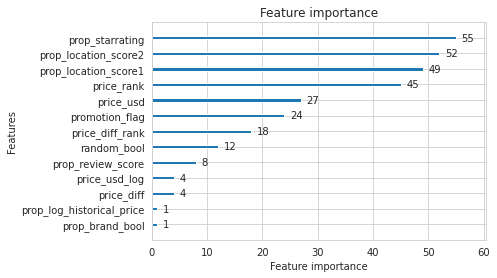

[ 0  0  0  0  0  0 55  8  1 49 52  1 27 24  0  0  0  0  0  0  0 12  0  0
  0  0  4 45 18  4]
['prop_starrating' 'prop_location_score2' 'srch_id' 'prop_id']


In [43]:

from lightgbm import plot_importance

plot_importance(gbm, max_num_features=30) 
plt.show()

importance_features = np.array(gbm.feature_importances_)
important_features = np.argwhere(importance_features > 50)
print(importance_features)
#print(gbm.feature_name_)

columns = np.array(X.columns.values.tolist())
important_features = important_features.reshape(important_features.shape[0]).tolist()
important_columns = columns[important_features]

important_columns = np.append(important_columns, ['srch_id', 'prop_id'])
print(important_columns)
X = X[important_columns]


#Do gradient boosting once more with the most important features

In [44]:
"""
del gbm
import lightgbm
gbm = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg",  n_estimators=200)

groups = np.unique(np.array(X['srch_id']),return_counts=True)[1]


gbm.fit(
    X=X,
    y=relavance_grade,
    group=groups
)
"""


'\ndel gbm\nimport lightgbm\ngbm = lightgbm.LGBMRanker(\n    objective="lambdarank",\n    metric="ndcg",  n_estimators=200)\n\ngroups = np.unique(np.array(X[\'srch_id\']),return_counts=True)[1]\n\n\ngbm.fit(\n    X=X,\n    y=relavance_grade,\n    group=groups\n)\n'

In [45]:

#test = test[important_columns]


#Predict on the test data

In [46]:
predictions = gbm.predict(test)
# del gbm

#Rank the predictions

In [ ]:
final_results = test[['srch_id','prop_id']]

final_results['likelihood to click'] = predictions.tolist()

final_results_sorted = final_results.groupby('srch_id', group_keys=False).apply(pd.DataFrame.nlargest, n=100, columns='likelihood to click')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
final_results

In [ ]:
compare = pd.read_csv(path +'/test_set_VU_DM.csv')

In [ ]:
#print(final_results)
results_to_send_in = final_results
results_to_send_in.to_csv('results.csv',index=False)
from google.colab import files 
files.download('results.csv')

#Make an excel file of the predictions

In [ ]:
#print(final_results)
results_to_send_in = final_results_sorted[['srch_id', 'prop_id']]
results_to_send_in.to_csv('results.csv',index=False)
from google.colab import files 
files.download('results.csv')

#Ander model

In [ ]:
"""
import xgboost as xgb
gbm = xgb.XGBRegressor(objective='rank:pairwise', n_estimators=300)


gbm.fit(train_train_data, train_train_label,
        eval_set =[(train_train_data, train_train_label), (train_test_data, train_test_label)], 
        eval_metric="ndcg@5", verbose=True)

"""